<a href="https://colab.research.google.com/github/charlesncn/DS-Python-Classify-Images/blob/main/ExpectationMaximization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Expectation Maximization Implimentation
## Group Memmbers includes:
###1.18/04123 Charles Njoroge Njuguna
###2. 18/03712 Brian Mutea
###3. 18/03681 George Kulundu
###4. 18/06469 Fanuel Okumu
###5. 18/02788 Allan Wamae
###6. 18/04320 Mitchel Ketcha
###7. 18/04314 Moses Kwereba


In [ ]:
#importing the dataset
import pandas as pd

bk = pd.read_csv('https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/burger-king-items.txt', sep='\t')

bk.head()

,Item,Serving.size,Calories,Fat.Cal,Protein(g),Fat(g),Sat.Fat(g),Trans.fat(g),Chol(mg),Sodium(mg),Carbs(g),Fiber(g),Sugar(g),Meat,Breakfast,Not Breakfast,CarbsxMeat
0,Hamburger,109.0,260,90.0,13,10.0,4.0,0.0,35,490,28,1.0,6,1,0,1,28
1,Cheeseburger,121.0,300,130.0,16,14.0,6.0,0.0,45,710,28,1.0,6,1,0,1,28
2,Double_Hamburger,146.0,360,160.0,22,18.0,8.0,0.0,70,520,28,1.0,6,1,0,1,28
3,Double_Cheeseburger,171.0,450,230.0,26,26.0,12.0,1.0,95,960,29,1.0,6,1,0,1,29
4,Buck_Double,158.0,410,200.0,24,22.0,10.0,0.5,85,740,28,1.0,6,1,0,1,28


In [ ]:
#importing the modules
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from  sklearn.metrics import silhouette_score

%matplotlib inline



SILHOUETTE: 0.357211963389611


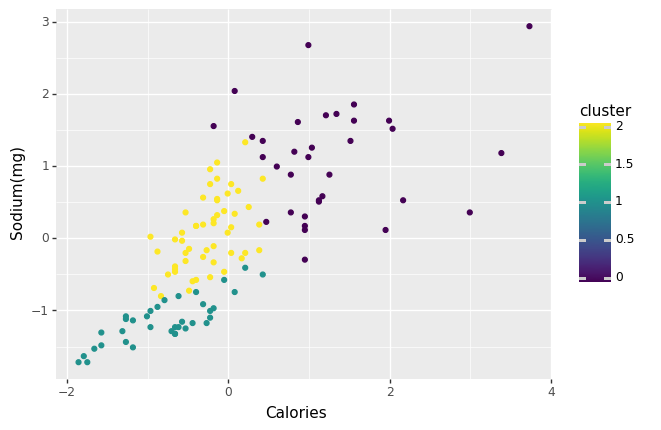

<ggplot: (8789315036061)>

In [ ]:
#selecting the features to which we will use to perform expectation maximization 


features = ["Calories", "Sodium(mg)"]
X = bk[features]

#standardizing the features
z= StandardScaler()

X[features] =z.fit_transform(X)

#setting the number of components and fitting the data into the model
EM = GaussianMixture(n_components = 3)

EM.fit(X)

cluster = EM.predict(X)
#printing out the silouhette score
print("SILHOUETTE:", silhouette_score(X,cluster))


X["cluster"] = cluster
#visualizing the results
(ggplot(X, aes(x = "Calories", y = "Sodium(mg)", color="cluster")) + geom_point())



**Multiple Dimensions**

In [ ]:
#selecting features to be used from the data set
features = ['Sugar(g)', "Protein(g)", "Fat(g)"]

X = bk[features]
z = StandardScaler()
#standardizing the feature
X[features] = z.fit_transform(X)
EM= GaussianMixture(n_components=4)
EM.fit(X)

cluster = EM.predict(X)
#hard assignment result
cluster


array([1, 1, 1, 0, 1, 1, 1, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 3,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2])

In [ ]:
print("SILHOUETTE:", silhouette_score(X,cluster))

SILHOUETTE: 0.3643077931020795


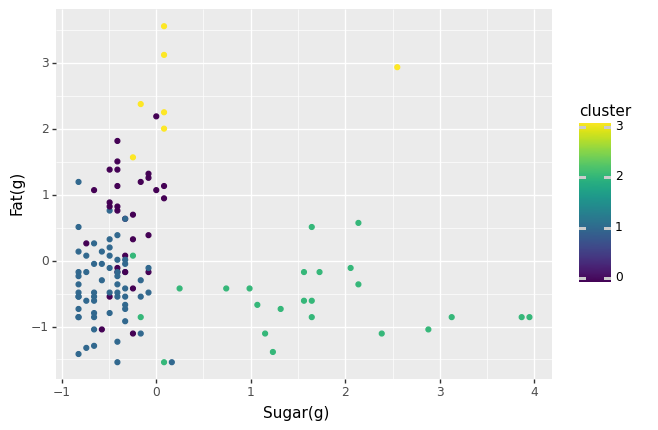

<ggplot: (8789309691381)>

In [ ]:
 X["cluster"] = cluster
 (ggplot(X, aes(x = "Sugar(g)", y = "Fat(g)", color="cluster")) + geom_point())

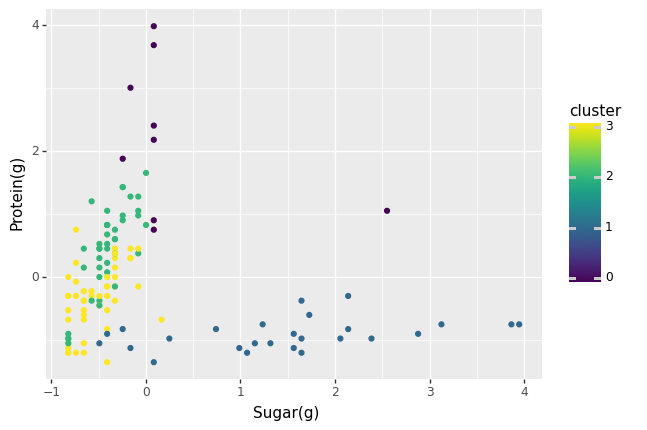

<ggplot: (8766517524665)>

In [ ]:
(ggplot(X, aes(x = "Sugar(g)", y = "Protein(g)", color="cluster")) + geom_point())

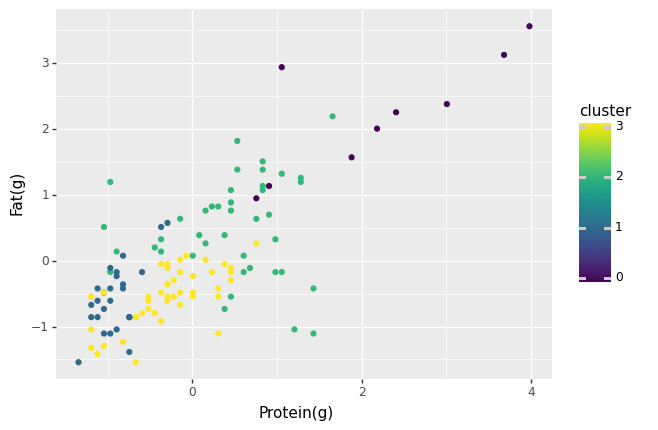

<ggplot: (8766517497865)>

In [ ]:
(ggplot(X, aes(x = "Protein(g)", y = "Fat(g)", color="cluster")) + geom_point())